## Laboratorio 2 - MLP (Convocatoria Extraordinaria)
## Parte 1: Setas
### Inteligencia Artificial II

### Miguel Márquez González

---

#### Librerías usadas

In [1]:
import numpy as np
import pandas as pd # Lectura y manejo de datos
from sklearn.preprocessing import LabelEncoder # Pre-procesamiento de los atributos
from sklearn.model_selection import train_test_split # Separar en train y test
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

---

#### Variables y parámetros

In [3]:
ds_path = ''
ds_name = ds_path + 'mushrooms.csv'

#### Carga de datos y pre-procesamiento

Lectura del dataset

In [4]:
df = pd.read_csv(ds_name)
print('Shape:', df.shape)
df.head()

Shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Cambio a valores numéricos

In [5]:
encoder_df = LabelEncoder()

for col in df.columns:
    df[col] = encoder_df.fit_transform(df[col])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Separación en variables y target

In [6]:
X = df.drop('class',axis=1)
y = df['class'] # Clase target
print('Target: 0 edible, 1 poisonous')

Target: 0 edible, 1 poisonous


Separación de datos en train y test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---

### MLP

In [8]:
np.shape(X_train)[1]

22

In [9]:
model = Sequential()
model.add(Dense(22, activation='relu', input_dim=22))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#optimizer = keras.optimizers.Adam(lr=0.05)
#model.compile(optimizer=optimizer, ...)
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                506       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 115       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 627
Trainable params: 627
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50)

Train on 5686 samples
Epoch 1/50
5686/5686 [==============================] - 0s 49us/sample - loss: 0.6185 - accuracy: 0.6648
Epoch 2/50
5686/5686 [==============================] - 0s 15us/sample - loss: 0.5337 - accuracy: 0.7524
Epoch 3/50
5686/5686 [==============================] - 0s 16us/sample - loss: 0.4496 - accuracy: 0.8060
Epoch 4/50
5686/5686 [==============================] - 0s 16us/sample - loss: 0.3898 - accuracy: 0.8405
Epoch 5/50
5686/5686 [==============================] - 0s 14us/sample - loss: 0.3392 - accuracy: 0.8637
Epoch 6/50
5686/5686 [==============================] - 0s 11us/sample - loss: 0.3001 - accuracy: 0.8792
Epoch 7/50
5686/5686 [==============================] - 0s 12us/sample - loss: 0.2686 - accuracy: 0.8955
Epoch 8/50
5686/5686 [==============================] - 0s 15us/sample - loss: 0.2445 - accuracy: 0.9080
Epoch 9/50
5686/5686 [==============================] - 0s 16us/sample - loss: 0.2254 - accuracy: 0.9186
Epoch 10/50
5686/5686 [==========

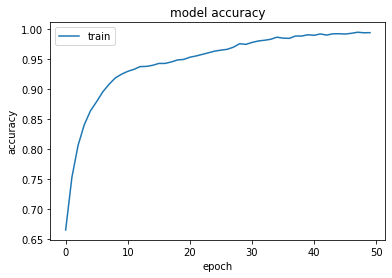

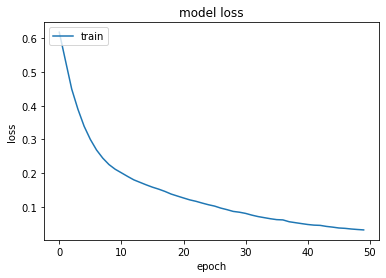

In [12]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Calcular precisión del modelo con datos de test

In [13]:
results = model.evaluate(X_test, y_test, batch_size=256)
print('Test Accuracy:', results[1])
print('Test Loss:', results[0])

2438/2438 [==============================] - 0s 22us/sample - loss: 0.0306 - accuracy: 0.9967
Test Accuracy: 0.99671865
Test Loss: 0.030625435037017357


#### Valores que más afectan a la red

In [14]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X.T))

NumPy covariance matrix: 
[[ 2.57387182e+00 -9.95511344e-02 -1.96876519e-01 -2.79700103e-02
  -7.40330855e-02  2.00790250e-02  7.79109328e-03  4.00790093e-02
  -3.42995766e-02  5.07121762e-02  5.13961457e-02 -3.03266863e-02
  -3.53445635e-02 -9.65934091e-02 -9.29905073e-02  0.00000000e+00
   2.82493201e-02 -4.63290498e-02 -7.35816317e-02 -2.80636470e-01
   1.27381247e-01 -1.16504654e-01]
 [-9.95511344e-02  1.51258643e+00 -6.07474457e-02  4.25683089e-02
   1.17032967e-01 -6.67106604e-03 -1.27773542e-01  1.18292528e-01
  -7.01100807e-01 -8.60623163e-03 -1.64752261e-01  6.80931466e-02
   8.97575939e-02  1.54485446e-01  1.61585054e-01  0.00000000e+00
  -4.95532347e-03 -8.71679173e-03 -2.35779373e-01  6.75052384e-01
   3.31927632e-02  3.46677708e-01]
 [-1.96876519e-01 -6.07474457e-02  6.48120427e+00 -9.59157435e-04
  -2.07331044e+00  1.67404007e-02  1.35154884e-01 -1.99402915e-01
   7.63042471e-01 -5.75840689e-01  8.67884731e-01 -9.62517880e-02
  -8.21049432e-02  1.14463656e-02  3.91237311e

In [16]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-5.18267628e-03 -8.18409723e-03  8.39165973e-02  2.57169525e-01
  -4.78989790e-02 -6.68923539e-01 -6.75979876e-01  1.14176927e-01
  -4.41261171e-03  5.16412162e-03 -7.51365169e-02  2.46707028e-02
   8.33971918e-03 -8.59444869e-04 -1.69755412e-03 -1.67968948e-02
   4.33637731e-03  1.76955900e-02  5.02109786e-04  1.38441885e-03
   3.62359857e-04  0.00000000e+00]
 [ 6.41840890e-02  2.34236367e-03 -4.71045728e-02 -1.16926660e-01
   1.32708655e-01  1.32171904e-01 -1.40603806e-01  2.02628884e-01
  -4.57796887e-02  9.26738272e-01 -4.80631418e-02  9.27798124e-02
   7.15336117e-02  1.55612233e-02  1.86590923e-02 -2.16927770e-02
   4.98957669e-02 -5.92554504e-02 -1.70588145e-03 -4.44991602e-03
  -4.01481059e-03  0.00000000e+00]
 [-1.94265170e-01 -6.22991933e-01 -4.94905553e-01 -3.59120700e-01
  -3.98005762e-01 -4.04198893e-02 -1.08438185e-01  1.22633718e-01
  -2.49978266e-02 -3.13068928e-02  7.61825829e-02  1.99593348e-02
  -3.93043950e-02 -1.89561643e-02 -5.38233410e-02  1.55814

Viendo los autovalores, los que poseen un mayor valor son los que más afectan, y del mismo modo son los que menos afectan aquellos que tienen un valor más bajo

In [19]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
